# TITANIC: Predicting Survival with Machine Learning

### This notebook traverses through a basic exploratory data analysis of the Titanic dataset provided by Kaggle, and subsequently builds a model that predicts a passenger's chances of survival

### This challenge is aimed at beginners and so the techniques used in this notebook have been kept fairly simple in order to encourage learning and further exploration of EDA, Machine Learning with Python

### We would be generating a kaggle submission file via this notebook but as mentioned before, the techniques discussed are simple. So this is defnitely not an exhaustive list of things to do with a given dataset. It is intended to serve as a starting point for your journey into EDA and Machine Learning

### With that said, let's get started!

#### E. Kartik

### We begin by importing the Libraries we require for our work

In [1]:
%matplotlib inline

import pandas as pd
import missingno as mns # This library may require installation - run !pip install missingno before importing

import matplotlib.pyplot as plt
import seaborn as sns

### And this is all we need to start. We will import more libraries as we go along

## DATA LOADING

### Kaggle gives us three datasets for this challenge and their descriptions are as follows:
### train.csv - This is Training data on which we do our Exploratory Data Analysis and subsequently train our Model on
### test.csv - Once our model is trained, it will be asked to make predictions using this dataset
### gender_submission.csv - This is an example submission file and depicts what your final submission should like

### Let's load all three files using Pandas (We are creating dataframes for each dataset)

In [2]:
# Laod the training data
train = pd.read_csv('train.csv')

# Load the test data
test = pd.read_csv('test.csv')

# Load the gender_submission file
gender_submission = pd.read_csv('gender_submission.csv')

### Take a look at the Training Data (first 5 rows)

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Take a look at the Test Data (first 5 rows)

In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


### Take a look at the Gender Submission Data (first 5 rows)

In [5]:
gender_submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


## EXPLORATORY DATA ANALYSIS & VISUALIZATION

### Our EDA is mainly targeted at the Training Dataset that we loaded above
### Once the Data is in a suitable format, we will create a Machine Learning Model that will be trained using this data
### Let's start by gathering some more information about this data

In [6]:
# Let's see the number of rows and columns in this dataset
train.shape

(891, 12)

### Let's take another look at the Dataset and try to understand the data we have been provied with

In [7]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### Data Descriptions

### ***********************************************************************************************************************************

### Survived: 0 = No, 1 = Yes (This column represents what is called the 'Dependent Variable' - the value we are trying to predict)
### Pclass (passenger class): 1 = First Class, 2 = Second Class, 3 = Third Class
### Name: Name of the Passenger
### Sex: Gender of the Passenger
### Age: Age of the Passenger in years
### SibSp: Sibling Spouse - this column may look intriguing. It represents the number of siblings and spouse a passenger had onboard the titanic
### Parch : Parent Child - represents the number of parents and children a passenger had aboard the titanic
### Ticket: Ticket number of the passenger
### Fare: Fare paid by the passenger to obtain a ticket
### Cabin: Cabin number of the passenger
### Embarked: The place from where a passenger embarked. S = Southampton, C = Cherbourg, Q = Queenstown
### ***********************************************************************************************************************************

### Just FYI: each row in the dataset represents a passenger

### The next important step for us is to check the number of null or missing values in our dataset

In [8]:
# Check the number of null or missing values in the dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### What do we have here? The Age column has 177 null/missing values, Cabin has 687 and Embarked has 2
### How do these null/missing values affect the outcome of our machine learning model?
### It is important to visualize null or missing values early so that you know where the holes in your dataset are
### This information helps with EDA, and figuring out the kind of data pre-prcocessing that needs to be done
### Ideally, a dataset should not have null or missing values in order for our model to be trained properly and thus give us accurate predictions


### Let's use the missingno library to visualize the null/missing values in our data

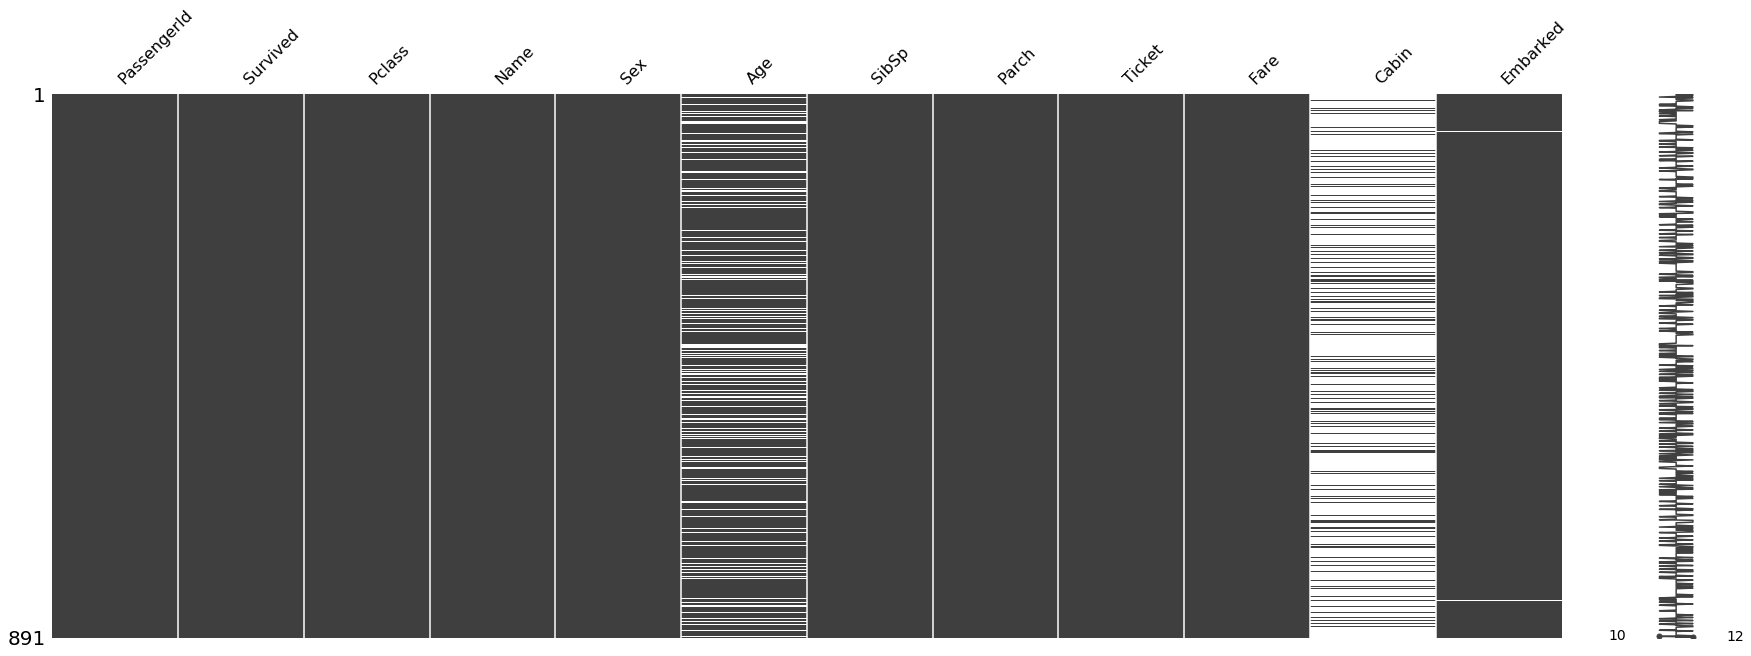

In [9]:
# Create a graph of null values using missingno
mns.matrix(train, figsize = (30, 10))

### The white lines in the graph above indicate null / missing values in the dataset
### We will come back to address the issue of null/ missing values shortly
### At this stage, when we are fairly acquainted with the data we have been given, we need to begin asking questions on how effectively this data can be utilized to accomplish our goals
### Our goal with this exercise is, given certain details of a passenger, predict whether that passenger survived the Titanic mishap or not

### So now we begin asking oursleves the important questions - what columns in the given dataset are relevant for achieving our goal? Or in other words, what kind of data is neccesary for predicting the survival of a passenger?

### Let's review the columns we have been provided with in the dataset

In [10]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

### Let's start with the obvious - which columns are not relevant at all for our predictions?
### Consider the Name and Cabin columns. Does the name of a passenger and the cabin occupied by him/her have any impact on his/her chances of survival?
### In my opinion, the answer is No. So we can go ahead and remove these two columns from our dataset

In [11]:
# Remove the Name and Cabin columns from the dataset 
# axis = 1 means Column and inplace = True removes the Column from the original dataset
train.drop("Name", axis = 1, inplace = True)
train.drop("Cabin", axis = 1, inplace = True)
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.0,1,0,113803,53.1000,S
4,5,0,3,male,35.0,0,0,373450,8.0500,S


### Good. Removing the Cabin column solved another problem for us. We removed a column that had the maximum number of null/missing values

In [12]:
# Review the number of null/missing values in our dataset
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         2
dtype: int64

### The Passengerid column is also not of much use to us, but let's retain it for now
### We now turn our attention to the reamining columns - Pclass, Sex, Age, SibSp, Parch, Ticket, Fare and Embarked
### Out of these, let's focus on Pclass, Sex and Age. If you are familiar with the movie Titanic, you would know that a passenger's class, gender and age were the most important factors in deciding whether that passenger survived or not (women and children were given preference for lifeboats, most of them being from first class)
### From that perspective, the SibSp and Parch columns too gain some importance for our solution, but we will discuss about them later

### Let's go ahead and create some visuals from our data, so that we understand it even better

#### We are using seaborn library for all data visualizations
### Starting with the number of passengers who survived and those who didn't

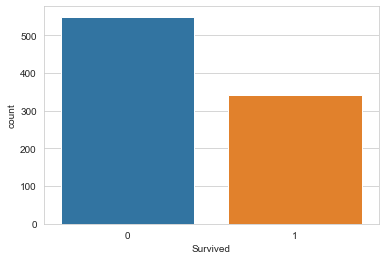

In [13]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', data = train)

#### Around 550 passengers did not survive this accident and a little more than 300 survived

### Let's plot a simple histogram to understand Age Distribution 

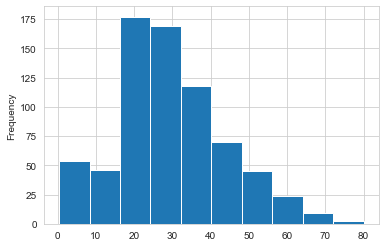

In [14]:
train.Age.plot.hist()

#### Maximum number of passengers were between the age of 20 to 40. Remember that this visualization is impacted by the number of null and missing values in our Age column (177)

### Let's view gender distribution

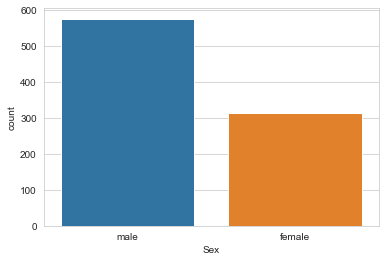

In [15]:
sns.set_style('whitegrid')
sns.countplot(x = 'Sex', data = train)

#### The number of male passengers exceeds 550 while women were around 300

### What impact does the Sex variable have on survival ?

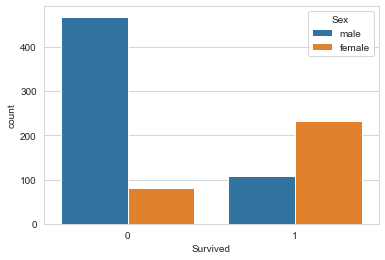

In [16]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Sex', data = train)

#### Out of those who survived (represented by 1), more were Female. Most of the Male passengers did not survive. This gives us an important insight into how the gender of a passenger had siginificant impact on chances of survival. The Sex column thus is going to be important for our predictions

### What impact does the Passenger Class have on Survival?

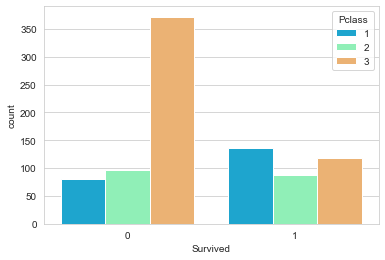

In [17]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Pclass', data = train, palette = 'rainbow')

#### Another important insight - from those who did not survive, maximum were from third class, whereas maximum who survived were from first class. The Pclass column thus is also an important factor in predicting survival

### What impact does SibSp have on Survival?

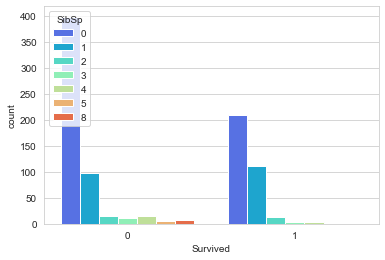

In [18]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'SibSp', data = train, palette = 'rainbow')

#### What insights do we get?
#### From the Passengers who Did Not Survive - 400 had No Siblings or Spouse on Board. 100 had a sibling or a spouse
#### From the Passengers who Survived - 200 had no siblings or spouse. A little over 100 had a sibling or spouse
#### How important is this information for our prediction? Maybe not as impactful as Sex, Pclass and Age, but important nonetheless. So we will retain this column

### What impact does Parch have on Survival?

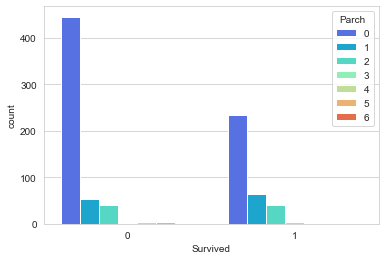

In [19]:
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Parch', data = train, palette = 'rainbow')

#### What insights do we get?
#### For passengers who Did Not survive - more than 450 had No Parents or Children on board
#### For passengers who survived - a little more than 200 had parents or children on board
#### How important is this information for our prediction? Just as SibSp, the Parch column does have a marginal impact on survival. So we will retain this column

### What impact does Ticket have on Suvival?

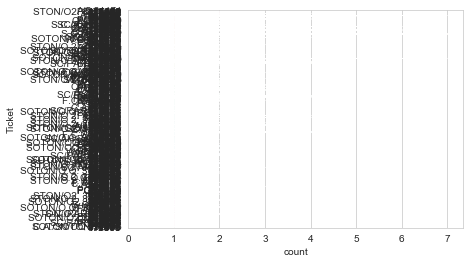

In [20]:
# Let's first see how many Ticket Types there are
sns.set_style('whitegrid')
sns.countplot(y = 'Ticket', data = train)

#### That does not look good at all. Let's visualize this in a different way

In [21]:
train.Ticket.value_counts()

CA. 2343            7
1601                7
347082              7
CA 2144             6
347088              6
                   ..
111428              1
F.C.C. 13531        1
2650                1
C.A./SOTON 34068    1
343276              1
Name: Ticket, Length: 681, dtype: int64

In [22]:
# Check how many unique tickets there are in the data
print("There are {} unique Ticket values..".format(len(train.Ticket.unique())))

There are 681 unique Ticket values..


#### 681 unique values are a bit too much for us to process. We could remove this column from our dataset, but let's retain it for now

### What impact does Fare have on Survival?

In [23]:
# Let's check how many type of Fare values we have
print("There are {} unique Fare values..".format(len(train.Fare.unique())))

There are 248 unique Fare values..


#### 248 values are also too much for us at this stage. We could remove this column also but let's retain it for now

### What impact does Embarked have on Survival?

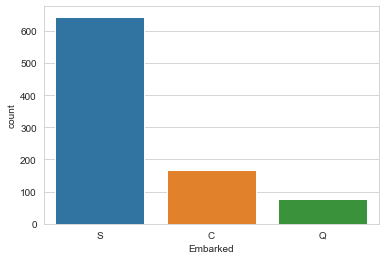

In [24]:
#### Let's get a count first
sns.set_style('whitegrid')
sns.countplot(x = 'Embarked', data = train)

#### More than 600 passengers embarked from Southampton
#### Let's review the number of null / missing values in this column

In [25]:
train.Embarked.isnull().sum()

2

#### There are two rows where we do not have values for Embarked. How do we handle this?
#### For now, we will remove those two rows from our dataset. This approach will have its own pros and cons, but for our purposes, deleting two rows will not have a significant impact on our model's accuracy. The deletion will be done shortly

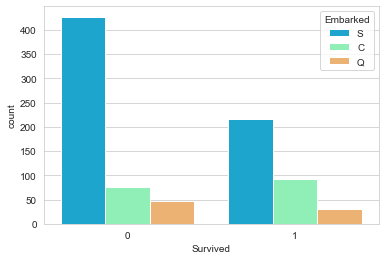

In [26]:
# Let's see the imapct of Embarked on Survival
sns.set_style('whitegrid')
sns.countplot(x = 'Survived', hue = 'Embarked', data = train, palette = 'rainbow')

#### From those who did not survive, maximum passengers had boarded from Southampton. Similar can be observed for maximum passengers who survived
#### The Embarked column does seem to have an impact on predicting survival, so we will retain it

## DATA CLEANING & ENCODING

### Armed with a good understanding of our data, we can now proceed to clean and encode the data so that our machine learning model can be properly trained for accurate predictions

### We will begin with the null / missing values in the Age Column
### The Age column is an important factor for survival prediction, and so we need to find a way to fill the empty cells in this column
### Since Age is a numeric value, we have multiple options to fill the column with data. One such option we will use for this exercise would be to calculate the average of all ages and populate the empty cells of the column with this value

In [27]:
# Populate empty cells in the Age Column with average of all ages
train['Age'].fillna(train['Age'].mean(), inplace = True)

### Let's review the null / missing values in our dataset now

In [28]:
train.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

### As mentioned before, we will now go ahead and delete the two rows where we have null / missing values for Embarked

In [29]:
# Delete all rows that have null / missing values in the Dataset 
# (ALWAYS do this AFTER you have filled required/important columns with proper data)
train.dropna(inplace = True)

### Great. Let's visualize our dataset now

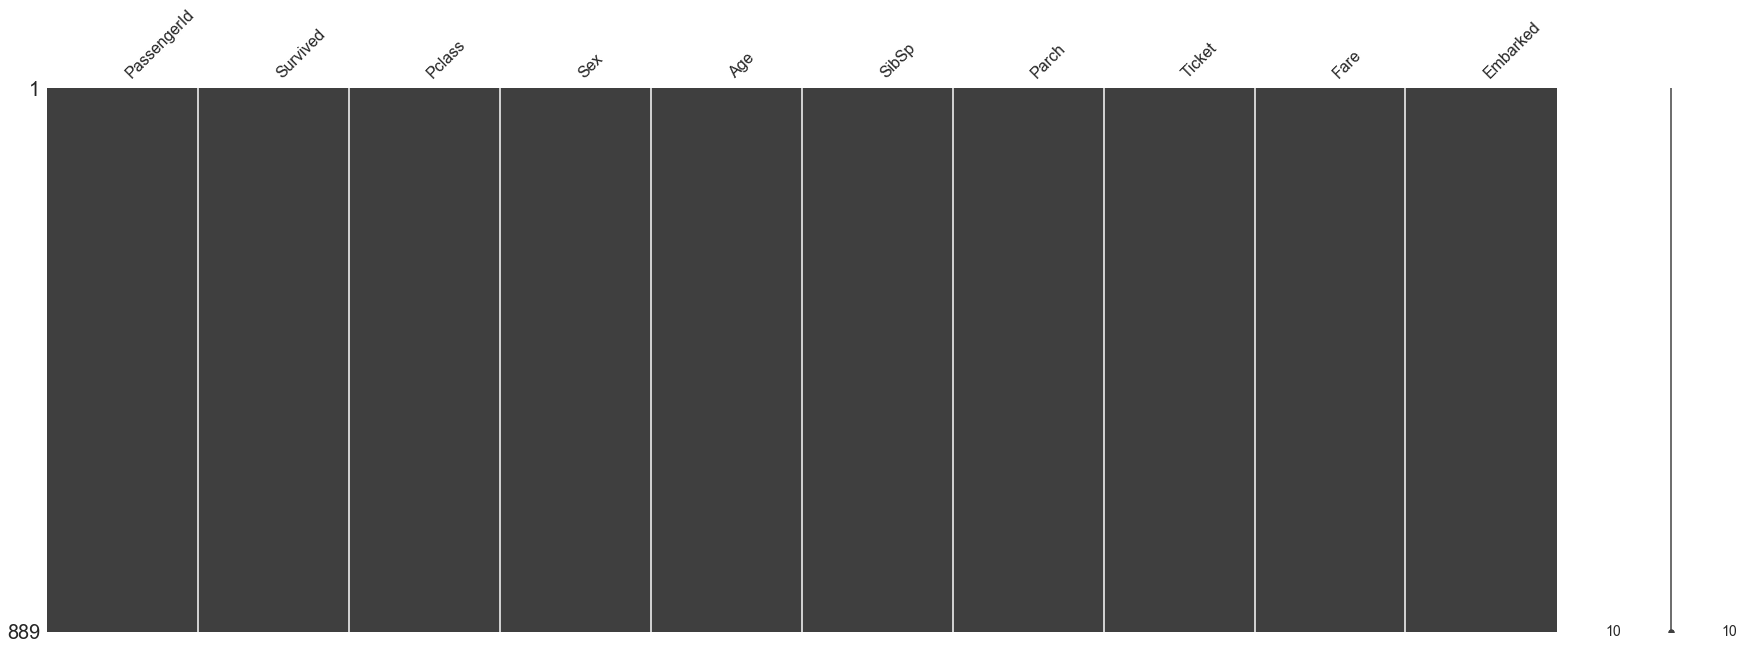

In [30]:
mns.matrix(train, figsize = (30, 10))

### That is a clean dataset !

### Let's take a look at our data

In [31]:
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,female,35.000000,1,0,113803,53.1000,S
4,5,0,3,male,35.000000,0,0,373450,8.0500,S
5,6,0,3,male,29.699118,0,0,330877,8.4583,Q
6,7,0,1,male,54.000000,0,0,17463,51.8625,S
7,8,0,3,male,2.000000,3,1,349909,21.0750,S
8,9,1,3,female,27.000000,0,2,347742,11.1333,S
9,10,1,2,female,14.000000,1,0,237736,30.0708,C


In [32]:
train.shape

(889, 10)

### We now have 889 rows and 10 columns in our dataset

### Now that our dataset is clean (relative to what we had in the beginning), we need to start talking about Encoding
### Machine Learning Models love numbers - and Encoding is a way to represent all the values in our dataset with numbers. This makes it really easy for the model to understand the data and then give accurate predictions when presented with new data
### e.g. If we look at the Survived Column - a 0 repesents 'No' and 1 represents 'Yes'. This is encoding in its simplest form. As a general rule, we encode the columns that have 'categorical' data, meaning that a cell in the column would have a value from a given set of values. So, Survived is categorical since it is either a 'Yes' or a 'No'. Similarly, Pclass, Sex and Embarked have categorical values, and so we need to encode these Columns. The Age, SibSp and Parch columns have numerical values and they are taken as they are. 

### String values are not understood by the model. So we will be deleting the Ticket column


### Encode the Pclass Column

In [33]:
pcl = pd.get_dummies(train['Pclass'], prefix = 'pclass')
pcl.head(10)

,pclass_1,pclass_2,pclass_3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
5,0,0,1
6,1,0,0
7,0,0,1
8,0,0,1
9,0,1,0


#### In our dataset we originally had 1, 2 & 3 representing the Pclass. What we have now are three columns that tell us the class a passenger belongs to
#### e.g. The first row in the above table has '1' for pclass_3 and 0 for the other two, meaning that this passenger belonged to the third class


### Encode the Sex Column

In [34]:
sex = pd.get_dummies(train['Sex'], prefix = 'sex')
sex.head()

,sex_female,sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1


#### And this should be pretty simple to understand. 1 under sex_male indicates that passenger is a male, vice versa for female

### Encode the Embarked Column

In [35]:
embark = pd.get_dummies(train['Embarked'], prefix = 'embark')
embark.head()

,embark_C,embark_Q,embark_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


#### And now we have a '1' representing the place from which a passenger embarked

### Let's go ahead and merge all these with our original dataset

In [36]:
train = pd.concat([train, pcl, sex, embark], axis = 1)
train.head(10)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embark_C,embark_Q,embark_S
0,1,0,3,male,22.000000,1,0,A/5 21171,7.2500,S,0,0,1,0,1,0,0,1
1,2,1,1,female,38.000000,1,0,PC 17599,71.2833,C,1,0,0,1,0,1,0,0
2,3,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,S,0,0,1,1,0,0,0,1
3,4,1,1,female,35.000000,1,0,113803,53.1000,S,1,0,0,1,0,0,0,1
4,5,0,3,male,35.000000,0,0,373450,8.0500,S,0,0,1,0,1,0,0,1
5,6,0,3,male,29.699118,0,0,330877,8.4583,Q,0,0,1,0,1,0,1,0
6,7,0,1,male,54.000000,0,0,17463,51.8625,S,1,0,0,0,1,0,0,1
7,8,0,3,male,2.000000,3,1,349909,21.0750,S,0,0,1,0,1,0,0,1
8,9,1,3,female,27.000000,0,2,347742,11.1333,S,0,0,1,1,0,0,0,1
9,10,1,2,female,14.000000,1,0,237736,30.0708,C,0,1,0,1,0,1,0,0


In [37]:
train.shape

(889, 18)

#### We have added 8 new (encoded) columns to our dataset - 3 for pclass, 2 for sex and 3 for embarked
### We will now go ahead and remove all columns that we no longer need - Sex, Embarked, Pclass, Ticket, Passengerid

In [38]:
train.drop(['PassengerId', 'Pclass', 'Sex', 'Ticket', 'Embarked'], axis = 1, inplace = True)
train.head(10)

,Survived,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embark_C,embark_Q,embark_S
0,0,22.000000,1,0,7.2500,0,0,1,0,1,0,0,1
1,1,38.000000,1,0,71.2833,1,0,0,1,0,1,0,0
2,1,26.000000,0,0,7.9250,0,0,1,1,0,0,0,1
3,1,35.000000,1,0,53.1000,1,0,0,1,0,0,0,1
4,0,35.000000,0,0,8.0500,0,0,1,0,1,0,0,1
5,0,29.699118,0,0,8.4583,0,0,1,0,1,0,1,0
6,0,54.000000,0,0,51.8625,1,0,0,0,1,0,0,1
7,0,2.000000,3,1,21.0750,0,0,1,0,1,0,0,1
8,1,27.000000,0,2,11.1333,0,0,1,1,0,0,0,1
9,1,14.000000,1,0,30.0708,0,1,0,1,0,1,0,0


### Let's create a graph once more to confirm there are no null / missing values

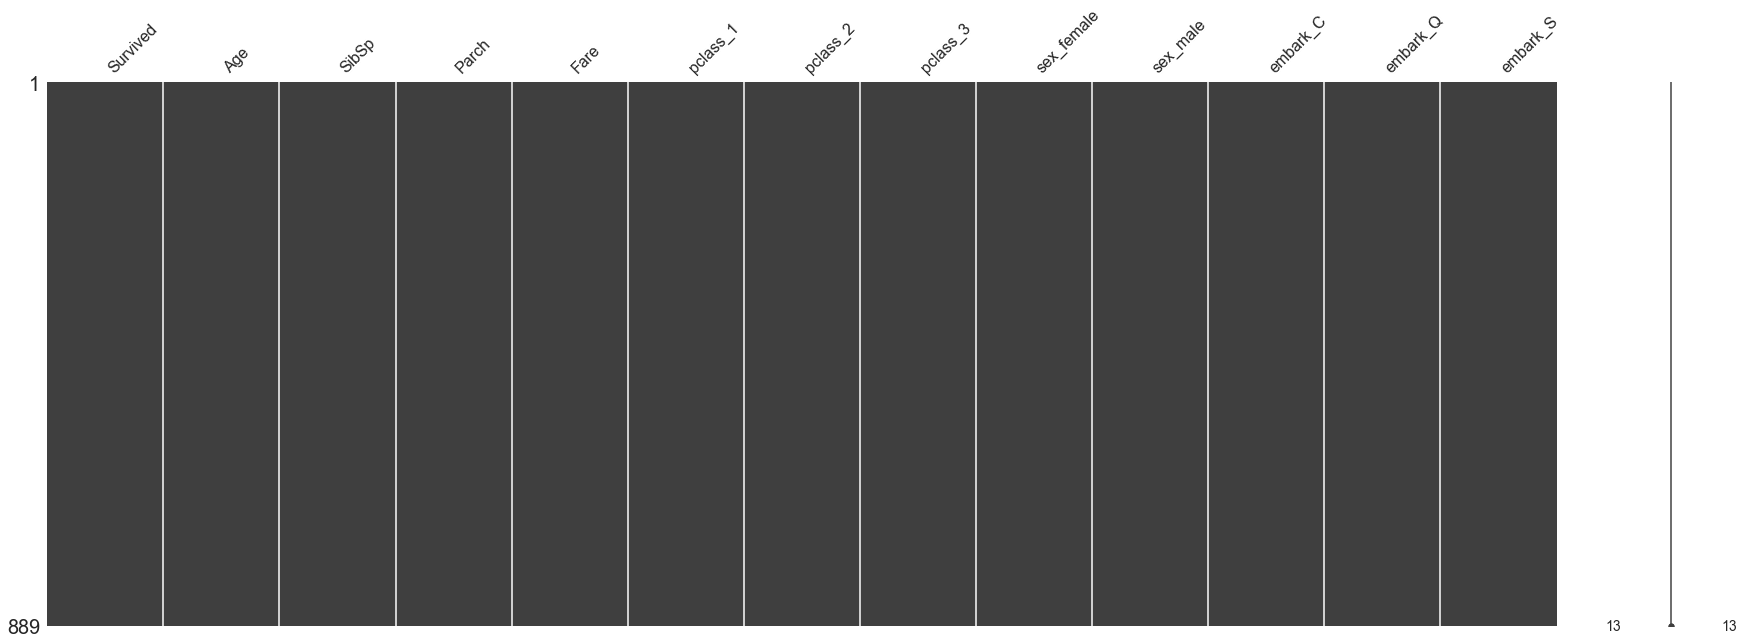

In [39]:
mns.matrix(train, figsize = (30, 10))

### That is a clean and encoded dataset !

## BUILD THE MODEL

### Our processed dataset can now be used to train a machine learning model so that it can predict survival

### We begin with splitting our dataset into a 'Training' Set and a 'Test' Set (not to be confused with the train and test sets we loaded at the beginning of this exercise)

#### Drop the 'Survived' column and store rest of the columns of our dataset in X. This data represents 'Features' - values that are evaluated to make predictions

In [40]:
# We dont have inplace = True, meaning that our processed dataset is not modified
X = train.drop('Survived', axis = 1)
X.head()

,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embark_C,embark_Q,embark_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


#### Store the 'Survived' column in Y. This is our 'Dependent' variable - the value which we need to predict

In [41]:
Y = train['Survived']
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### So we have 'X' that contains all our Features and 'Y' that contains the corresponding Dependent value

In [42]:
# import required library for splitting the data
from sklearn.model_selection import train_test_split as tts

### The X dataset will be divided into X_Train and X_Test. Similarly, the Y dataset will be split into Y_train and Y_test
### The test size is 0.30, meaning 70% will be set as training and remaining 30% as test data

In [43]:
X_train, X_test, Y_train, Y_test = tts(X, Y, test_size = 0.3, random_state = 1)

#### Take a look at the X_Train dataset

In [44]:
X_train.head(10)

,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embark_C,embark_Q,embark_S
115,21.000000,0,0,7.9250,0,0,1,0,1,0,0,1
874,28.000000,1,0,24.0000,0,1,0,1,0,1,0,0
77,29.699118,0,0,8.0500,0,0,1,0,1,0,0,1
876,20.000000,0,0,9.8458,0,0,1,0,1,0,0,1
682,20.000000,0,0,9.2250,0,0,1,0,1,0,0,1
133,29.000000,1,0,26.0000,0,1,0,1,0,0,0,1
868,29.699118,0,0,9.5000,0,0,1,0,1,0,0,1
278,7.000000,4,1,29.1250,0,0,1,0,1,0,1,0
58,5.000000,1,2,27.7500,0,1,0,1,0,0,0,1
247,24.000000,0,2,14.5000,0,1,0,1,0,0,0,1


In [45]:
X_train.shape

(622, 12)

#### Take a look at the X_test dataset

In [46]:
X_test.head(10)

,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embark_C,embark_Q,embark_S
387,36.0,0,0,13.0000,0,1,0,1,0,0,0,1
259,50.0,0,1,26.0000,0,1,0,1,0,0,0,1
771,48.0,0,0,7.8542,0,0,1,0,1,0,0,1
208,16.0,0,0,7.7500,0,0,1,1,0,0,1,0
683,14.0,5,2,46.9000,0,0,1,0,1,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
677,18.0,0,0,9.8417,0,0,1,1,0,0,0,1
542,11.0,4,2,31.2750,0,0,1,1,0,0,0,1
532,17.0,1,1,7.2292,0,0,1,0,1,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1


In [47]:
X_test.shape

(267, 12)

#### The X_train dataset has 622 columns and X_test has 267 (622 + 267 = 889, the original number of rows in our processed dataset)

#### Take a look at the Y_train dataset

In [48]:
Y_train.head(10)

115    0
874    1
77     0
876    0
682    0
133    1
868    0
278    0
58     1
247    1
Name: Survived, dtype: int64

#### Take a look at the Y_test dataset

In [49]:
Y_test.head(10)

387    1
259    1
771    0
208    1
683    0
3      1
677    1
542    0
532    0
2      1
Name: Survived, dtype: int64

#### Both Y datasets contain the corresponding (in relation to rows in X_train, X_test) dependent variable values (Survived)

### Great. Let's start building our model

#### We will be using a simple Logistic Regression Algorithm for this exercise as it is a 'classifier' type problem we are trying to solve (Yes / No)

In [50]:
# Import the model
from sklearn.linear_model import LogisticRegression

#### Create the model and fit the Training Data (X_train, Y_train) to train it

In [51]:
logmodel = LogisticRegression(max_iter = 900)
logmodel.fit(X_train, Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=900,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

#### Now, let's predict

In [52]:
predictions = logmodel.predict(X_test)
predictions

array([1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0], dtype=int64)

### So what happened here? We created our machine learning model and trained it using the X_train, Y_train datatsets
### Thereafter, we used the model for prediction by passing the X_test dataset to it. This resulted in the output we see above
### The Output is an array containing values for 'Survived'. These values are compared against the Y_test dataset to ascertain the accuracy of our model

In [53]:
# Let's check the accuracy of our model
from sklearn.metrics import accuracy_score

# We check the accuracy of the values predicted by our model against the Y_test dataset
print(accuracy_score(Y_test, predictions) * 100)

83.52059925093633


### Our model has an accuracy of around 83%, which is good

### We now have a trained model using which we can predict whether a given passenger survived or not
### How can we verify this?
### Let's re-visit the 'X' dataset that we had created above, before the model was built

In [54]:
X.head()

,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embark_C,embark_Q,embark_S
0,22.0,1,0,7.2500,0,0,1,0,1,0,0,1
1,38.0,1,0,71.2833,1,0,0,1,0,1,0,0
2,26.0,0,0,7.9250,0,0,1,1,0,0,0,1
3,35.0,1,0,53.1000,1,0,0,1,0,0,0,1
4,35.0,0,0,8.0500,0,0,1,0,1,0,0,1


### Consider the first row - Passenger Age = 22.0, SibSp = 1, Parch = 0, Fare = 7.2500, pclass_3 = 1, sex_male = 1, embark_s = 1
### Did this passenger survive? We can get to know by looking at the first row in the 'Y' dataset (contains Survived values for each row of X)

In [55]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

### We can see that this passenger has Survived = 0 which means that he did not survive

### If we give the feature values of this passenger (data from X) to our modelfor prediction, it should give us back 0

In [56]:
# Input passenger feature values to the model
predictions = logmodel.predict([[22.0, 1, 0, 7.2500, 0, 0, 1, 0, 1, 0, 0, 1]])
predictions

array([0], dtype=int64)

### And indeed we get back 0, meaning that our model predicted correctly!

## FINAL TEST & SUBMISSION

### We now need to use our model and make predictions against the original test data we had loaded at the beginning of this exercise
### Take a look at the Test Data

In [57]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [58]:
test.shape

(418, 11)

#### The dataset has 418 rows. Let's check the null values

In [59]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

#### The Age column has 86 null / missing values, Cabin has 327 and Fare has 1
#### Let's revisit our 'X_train' dataset to see the columns our model was trained on

In [60]:
X_train.head()

,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embark_C,embark_Q,embark_S
115,21.000000,0,0,7.9250,0,0,1,0,1,0,0,1
874,28.000000,1,0,24.0000,0,1,0,1,0,1,0,0
77,29.699118,0,0,8.0500,0,0,1,0,1,0,0,1
876,20.000000,0,0,9.8458,0,0,1,0,1,0,0,1
682,20.000000,0,0,9.2250,0,0,1,0,1,0,0,1


#### The test dataset does not look anything close to this, so let's correct that
#### We begin by encoding the Pclass, Sex and Embarked columns

In [61]:
test_pcl = pd.get_dummies(test['Pclass'], prefix = 'pclass')
test_pcl.head()

,pclass_1,pclass_2,pclass_3
0,0,0,1
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


In [62]:
test_sex = pd.get_dummies(test['Sex'], prefix = 'sex')
test_sex.head()

,sex_female,sex_male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0


In [63]:
test_embark = pd.get_dummies(test['Embarked'], prefix = 'embark')
test_embark.head()

,embark_C,embark_Q,embark_S
0,0,1,0
1,0,0,1
2,0,1,0
3,0,0,1
4,0,0,1


### Append all these to the Test dataset

In [64]:
test = pd.concat([test, test_pcl, test_sex, test_embark], axis = 1)
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embark_C,embark_Q,embark_S
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0,1,0,1,0,1,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0,1,1,0,0,0,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,1,0,0,1,0,1,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0,1,0,1,0,0,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0,1,1,0,0,0,1


#### We now need to fill values in the Age, Fare columns

In [65]:
test['Age'].fillna((test['Age'].mean()), inplace = True)

In [66]:
test['Fare'].fillna((test['Fare'].mean()), inplace = True)

In [67]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          327
Embarked         0
pclass_1         0
pclass_2         0
pclass_3         0
sex_female       0
sex_male         0
embark_C         0
embark_Q         0
embark_S         0
dtype: int64

#### The Age, Fare columns now have values. Cabin still has 327 null / missing

#### Let's find the columns we made predictions on using the X_train dataset

In [68]:
test_columns = X_train.columns
test_columns

Index(['Age', 'SibSp', 'Parch', 'Fare', 'pclass_1', 'pclass_2', 'pclass_3',
       'sex_female', 'sex_male', 'embark_C', 'embark_Q', 'embark_S'],
      dtype='object')

#### We will use only these columns from the test dataset to make predictions with our model

In [69]:
test[test_columns]

,Age,SibSp,Parch,Fare,pclass_1,pclass_2,pclass_3,sex_female,sex_male,embark_C,embark_Q,embark_S
0,34.50000,0,0,7.8292,0,0,1,0,1,0,1,0
1,47.00000,1,0,7.0000,0,0,1,1,0,0,0,1
2,62.00000,0,0,9.6875,0,1,0,0,1,0,1,0
3,27.00000,0,0,8.6625,0,0,1,0,1,0,0,1
4,22.00000,1,1,12.2875,0,0,1,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
413,30.27259,0,0,8.0500,0,0,1,0,1,0,0,1
414,39.00000,0,0,108.9000,1,0,0,1,0,1,0,0
415,38.50000,0,0,7.2500,0,0,1,0,1,0,0,1
416,30.27259,0,0,8.0500,0,0,1,0,1,0,0,1


#### Let's predict

In [70]:
# Pass the test_columns to our model
predictions = logmodel.predict(test[test_columns])
# Show the top 20 values from the prediction output array
predictions[:20]

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1],
      dtype=int64)

#### Create a submission dataframe and add the relevant columns

In [71]:
# Create a blank dataframe
submission = pd.DataFrame()
# Create a column 'PassengerId' and copy values from the same column in the Test Dataset
submission['PassengerId'] = test['PassengerId']
submission['Survived'] = predictions # Values predicted by our model against the test dataset
submission.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


#### Let's check if our submission and test dataframes are of the same length

In [72]:
if len(submission) == len(test):
    print("Submision dataframe is the same length as test ({} rows) dataframe".format(len(submission)))
else:
    print("Length mismatch with Test dataframe won't be able to submit to Kaggle")

Submision dataframe is the same length as test (418 rows) dataframe


#### Convert the Submission dataframe to CSV

In [73]:
submission.to_csv('../logistic_submission.csv', index = False)
print('CSV submission is ready!')

CSV submission is ready!


#### Let's verify if submission csv is in the right format

In [74]:
sub_check = pd.read_csv('../logistic_submission.csv')
sub_check.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


#### And that's it! The CSV file can be submitted to Kaggle!